In [1]:
# Importanweisungen

import numpy as num
import scipy as sci
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.axes as axes
import math
from scipy import optimize
import uncertainties as uc
import uncertainties.unumpy as unp 
unv=unp.nominal_values
usd=unp.std_devs

In [2]:
# Konstanten fuer einheitliche Darstellung

fig_size = (10, 6)
fig_legendsize = 14
fig_labelsize = 12

In [3]:
# allgemeine Fitfunktionen

def linear(x,m): # lineare Funktion mit f(x) = m * x 
    return(m*x)

def gerade(x, m, b): # gerade mit = f(x) = m * x + b
    return (m*x + b)

# fittet ein dataset mit gegebenen x und y werten, eine funktion und ggf. anfangswerten und y-Fehler
# gibt die passenden parameter der funktion, sowie dessen unsicherheiten zurueck
#
# https://stackoverflow.com/questions/14581358/getting-standard-errors-on-fitted-parameters-using-the-optimize-leastsq-method-i#
# Updated on 4/6/2016
# User: https://stackoverflow.com/users/1476240/pedro-m-duarte
def fit_curvefit(datax, datay, function, p0=None, yerr=None, **kwargs):

    pfit, pcov = \
         optimize.curve_fit(function,datax,datay,p0=p0,\
                            sigma=yerr, epsfcn=0.0001, **kwargs)
    error = [] 
    for i in range(len(pfit)):
        try:
          error.append(num.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    pfit_curvefit = pfit
    perr_curvefit = num.array(error)
    return pfit_curvefit, perr_curvefit 

# usage zB:
# pfit, perr = fit_curvefit(unv(xdata), unv(ydata), gerade, yerr = usd(ydata), p0 = [1, 0])
# fuer eine gerade mit anfangswerten m = 1, b = 0

In [4]:
# gibt Daten fuer LaTeX bereitgestellt aus

def latex_printValue(val, file):
    f = open('data/%s.txt' % file, 'w')
    f.write(str(val).replace('/', ''))

In [5]:
# import der messwerte

unc_U = 25/num.sqrt(6) # analog in V
unc_t = 1/num.sqrt(3) # digital in s
unc_d = 0.05/num.sqrt(6) # analog in mm

data = num.loadtxt("messung/charakteristik.txt", comments = "#", delimiter = "\t", unpack=False)
U1 = unp.uarray(data[:,0], unc_t) # erste spalte Spannung in V
N1 = data[:,2] # dritte Spalte Zaehlung in 1
T1 = unp.uarray(data[:,1], unc_t) # zweite Spalte Zeit der Messung in s

data = num.loadtxt("messung/hintergrundLow.txt", comments = "#", delimiter = "\t", unpack = False)
N_HL = data[:,0] # Ereignisse pro Messung
T_HL = unp.uarray(data[:,1], unc_t) # Messdauer

data = num.loadtxt("messung/hintergrundHigh.txt", comments = "#", delimiter = "\t", unpack = False)
N_HH = data[:,0] # Ereignisse pro Messung
T_HH = unp.uarray(data[:,1], unc_t) # Messdauer

data = num.loadtxt("messung/betaAluminium.txt", comments = "#", delimiter = "\t", unpack = False)
N_betaAlu = data[:,0] # erste Spalte Zaehlung
d_betaAlu = unp.uarray(data[:,1], data[:,2]) # zweite Spalte dicke mit dritte Spalte unsicherheit in mm
T_betaAlu = unp.uarray(data[:,3], unc_t) # vierte Spalte Zitmessung

data = num.loadtxt("messung/gammaBlei.txt", comments = '#', delimiter = "\t", unpack = False)
N_gammaBlei = data[:,0] # erste Spalte Zaehlung
d_gammaBlei = unp.uarray(data[:,1], unc_d) # zweite Spalte BleiDicke in mm
T_gammaBlei = unp.uarray(data[:,2], unc_t) # dritte Spalte Zeit fuer eine Messung

N_gummi = 652
T_gummi = uc.ufloat(178, unc_t)
d_gummi = uc.ufloat(2, unc_d)

N_plexi = 650
T_plexi = uc.ufloat(506, unc_t)
d_plexi = uc.ufloat(4.05, unc_d)

In [6]:
# weitere Werte
# Werte von https://physics.nist.gov/cuu/Constants/index.html[0]
# Dichte Blei von http://www.periodensystem.info/elemente/blei/
# Dichte Alu von http://www.periodensystem.info/elemente/aluminium
# Dichte Gummi und Plexiglas von https://de.wikibooks.org/wiki/Tabellensammlung_Chemie/_Dichte_fester_Stoffe

c = 299792458 # m/s
k_B = uc.ufloat_fromstr("1.38064852(79)e-23") # J K-1 [0]
h = uc.ufloat_fromstr("4.135667662(25)e-15") # eV s [0]
r_e = uc.ufloat_fromstr("2.8179403227(19)e-15") # m [0]
R = uc.ufloat_fromstr("8.3144598(48)") # J mol-1 K-1 [0]
rho_Blei = 11.342 # g cm-3 = kg dm-3 = kg/l
rho_Alu = 2.698 # g cm-3 = kg dm-3 = kg/l
rho_Gummi = 0.930 # same
rho_Plexi = 1.19 # same

In [9]:
# Rechnung

# Charakteristik
z1 = N1 / T1

# Hintergrund
z_HH = N_HH / T_HH
k_HH = num.sum(z_HH) / len(z_HH)

sigma = (z_HH - k_HH)**2
sigma = unp.sqrt(sum(sigma) / len(z_HH))

# Gamma Blei
z_Blei = N_gammaBlei / T_gammaBlei
lnBlei = unp.log(z_Blei - k_HH)

# Beta Alu
HL_hist = num.histogram(unv(N_HL), bins = 9)
HH_hist = num.histogram(unv(N_HH), bins = 9)

lnAlu = unp.log(N_betaAlu / T_betaAlu - k_HH)

latex_printValue(k_HH, "bckgndMittelwert")
latex_printValue(sigma, "bckgndSigma")

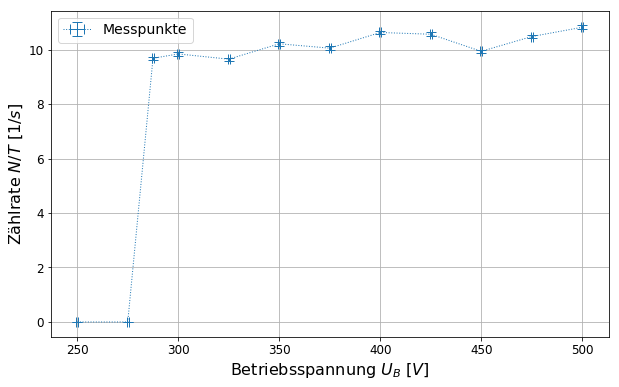

In [11]:
# diagramm 1: Charakteristik Zaehlrohr

fig=plt.figure(figsize=fig_size)

# kein Fit!
# p0 = None # startwerte, wenn unsicher: p0 = None
# pfit, perr = fit_curvefit(unv(sqrth), unv(a), gerade, yerr = usd(a))
# p = unp.uarray(pfit, perr)

plt.errorbar(unv(U1),unv(z1),usd(z1),usd(U1),fmt=':', capsize=5, linewidth=1, label='Messpunkte')

#plt.xlim(0,1200)
plt.legend(prop={'size':fig_legendsize})
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel("Betriebsspannung $U_B$ [$V$]", {'fontsize':fig_legendsize+2})
plt.ylabel("Zählrate $N/T$ [$1/s$]", {'fontsize': fig_legendsize+2})
plt.savefig("data/CharakteristikZaehlrohr.pdf")
plt.show()

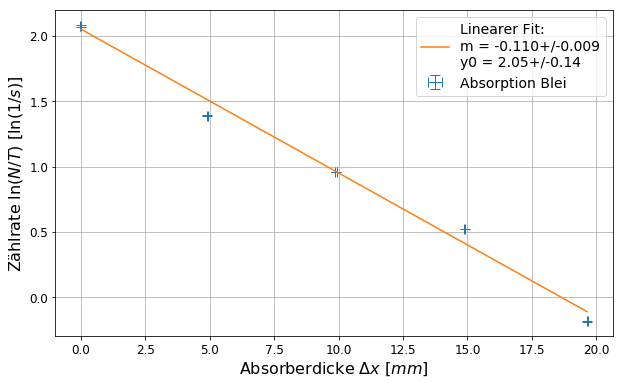

In [30]:
# diagramm: Gamma Absorption
fig=plt.figure(figsize=fig_size)

pfit, perr = fit_curvefit(unv(d_gammaBlei), unv(lnBlei), gerade, yerr = usd(lnBlei), p0 = [-1, 2])
p = unp.uarray(pfit, perr)

latex_printValue(-p[0]*10, "absorptionBlei_cm-1")
latex_printValue(-p[0]*10/rho_Blei, "absorptionMasseBlei_cm2g-1")

plt.errorbar(unv(d_gammaBlei),unv(lnBlei),usd(lnBlei),usd(d_gammaBlei),fmt=' ', capsize=5, linewidth=1, label='Absorption Blei')
plt.plot(unv(d_gammaBlei), gerade(unv(d_gammaBlei), *pfit), label='Linearer Fit:\nm = %s\ny0 = %s' % tuple(p))

#plt.xlim(0,1200)
plt.legend(prop={'size':fig_legendsize})
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel("Absorberdicke $\Delta x$ [$mm$]", {'fontsize':fig_legendsize+2})
plt.ylabel("Zählrate $\ln(N/T)$ [$\ln(1/s)$]", {'fontsize': fig_legendsize+2})
plt.savefig("data/GammaAbsorber.pdf")
plt.show()

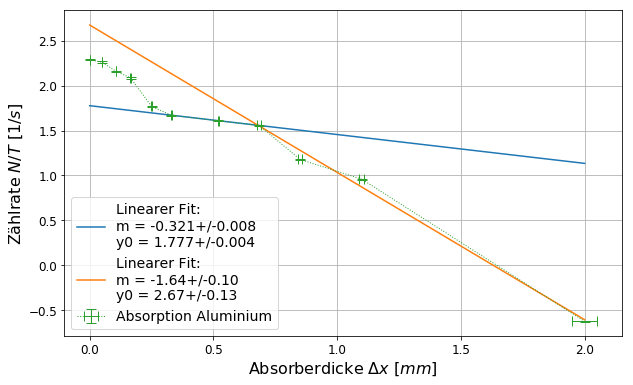

In [13]:
# diagramm: Gamma Absorption
fig=plt.figure(figsize=fig_size)

# erster Fit
p1 = list(filter((lambda x: x[0] > 0.25 and x[0] < 0.75), num.transpose([d_betaAlu,lnAlu])))
x, y = num.transpose(p1)
pfit, perr = fit_curvefit(unv(x), unv(y), gerade, yerr = usd(y), p0 = [-1, 2])
p = unp.uarray(pfit, perr)
absorbAlu1 = p[0]
absorbAlu01 = p[1]

latex_printValue(-p[0]*10, "absorptionAlu1_cm-1")
latex_printValue(-p[0]*10/rho_Alu, "absorptionMasseAlu1_cm2g-1")

plt.plot(unv(d_betaAlu), gerade(unv(d_betaAlu), *pfit), label='Linearer Fit:\nm = %s\ny0 = %s' % tuple(p))

# zweiter Fit
p1 = list(filter((lambda x: x[0] > 0.6), num.transpose([d_betaAlu,lnAlu])))
x, y = num.transpose(p1)
pfit, perr = fit_curvefit(unv(x), unv(y), gerade, yerr = usd(y), p0 = [-1, 2])
p = unp.uarray(pfit, perr)
absorbAlu2 = p[0]
absorbAlu02 = p[1]

absAlu = [absorbAlu1, absorbAlu2]
absAlu0 = [absorbAlu01, absorbAlu02]

latex_printValue(-p[0]*10, "absorptionAlu2_cm-1")
latex_printValue(-p[0]*10/rho_Alu, "absorptionMasseAlu2_cm2g-1")

plt.plot(unv(d_betaAlu), gerade(unv(d_betaAlu), *pfit), label='Linearer Fit:\nm = %s\ny0 = %s' % tuple(p))

# Messwerte
plt.errorbar(unv(d_betaAlu),unv(lnAlu),usd(lnAlu),usd(d_betaAlu),fmt=':', capsize=5, linewidth=1, label='Absorption Aluminium')

#plt.xlim(0,1200)
plt.legend(prop={'size':fig_legendsize})
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel("Absorberdicke $\Delta x$ [$mm$]", {'fontsize':fig_legendsize+2})
plt.ylabel("Zählrate $N/T$ [$1/s$]", {'fontsize': fig_legendsize+2})
plt.savefig("data/BetaAbsorber.pdf")
plt.show()

In [14]:
# Rechnung Gummi, Plexiglas

a = N_gummi/T_gummi
# Gummi
b_gummi1 = unp.log(absorbAlu01/a) / d_gummi
b_gummi2 = unp.log(absorbAlu02/a) / d_gummi
latex_printValue(-b_gummi1*10, "absorptionGummi1_cm-1")
latex_printValue(-b_gummi1*10/rho_Gummi, "absorptionMasseGummi1_cm2g-1")
latex_printValue(-b_gummi2*10, "absorptionGummi2_cm-1")
latex_printValue(-b_gummi2*10/rho_Gummi, "absorptionMasseGummi2_cm2g-1")

a = N_plexi/T_plexi
# Plexiglas
b_plexi1 = unp.log(absorbAlu01/a) / d_plexi
b_plexi2 = unp.log(absorbAlu02/a) / d_plexi
latex_printValue(-b_plexi1*10, "absorptionPlexi1_cm-1")
latex_printValue(-b_plexi1*10/rho_Gummi, "absorptionMassePlexi1_cm2g-1")
latex_printValue(-b_plexi2*10, "absorptionPlexi2_cm-1")
latex_printValue(-b_plexi2*10/rho_Gummi, "absorptionMassePlexi2_cm2g-1")

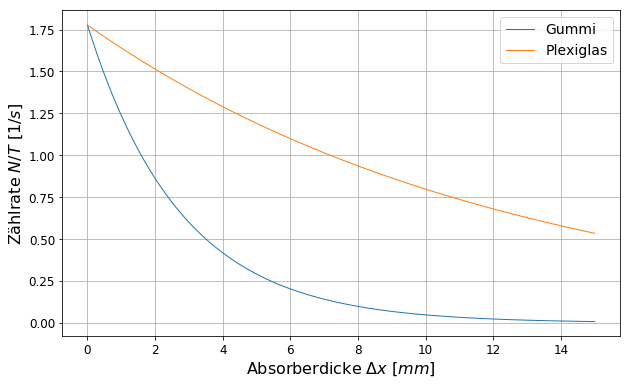

In [26]:
# diagramm: Gummi und Plexi Diagramm
fig=plt.figure(figsize=fig_size)

x = num.linspace(0,15,100)
y1 = absorbAlu01 * unp.exp(b_gummi1 * x)
y2 = absorbAlu01 * unp.exp(-b_plexi1 * x)
plt.plot(unv(x), unv(y1), linewidth=1, label='Gummi')
plt.plot(unv(x), unv(y2), linewidth=1, label='Plexiglas')

#plt.xlim(0,1200)
plt.legend(prop={'size':fig_legendsize})
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel("Absorberdicke $\Delta x$ [$mm$]", {'fontsize':fig_legendsize+2})
plt.ylabel("Zählrate $N/T$ [$1/s$]", {'fontsize': fig_legendsize+2})
plt.savefig("data/GummiPlexiAbsorber1.pdf")
plt.show()

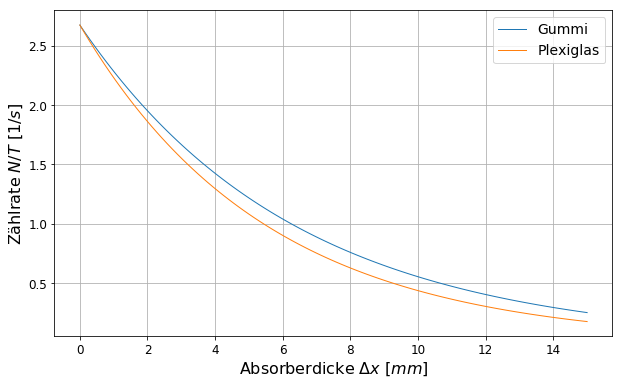

In [25]:
# diagramm: Gummi und Plexi Diagramm
fig=plt.figure(figsize=fig_size)

x = num.linspace(0,15,100)
y1 = absorbAlu02 * unp.exp(b_gummi2 * x)
y2 = absorbAlu02 * unp.exp(-b_plexi2 * x)
plt.plot(unv(x), unv(y1), linewidth=1, label='Gummi')
plt.plot(unv(x), unv(y2), linewidth=1, label='Plexiglas')

#plt.xlim(0,1200)
plt.legend(prop={'size':fig_legendsize})
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel("Absorberdicke $\Delta x$ [$mm$]", {'fontsize':fig_legendsize+2})
plt.ylabel("Zählrate $N/T$ [$1/s$]", {'fontsize': fig_legendsize+2})
plt.savefig("data/GummiPlexiAbsorber2.pdf")
plt.show()